In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# File to Load (Remember to Change These)
house_data_to_load = "Resources/All residential property data.csv"
# commodities_data_to_load = "Resources/commodities-workbook (6).csv"
# CPI_data_to_load = "Resources/g01hist (4).csv"

# Read house and commodities Data File and store into Pandas DataFrames
house_data = pd.read_csv(house_data_to_load)
# commodities_data = pd.read_csv(commodities_data_to_load)

#  # Combine the data into a single dataset.  
# data_complete = pd.merge(house_data, school_data, how="left", on=["school_name", "school_name"])
# # school_data_complete.head()

In [2]:
house_data.head()


,DATAFLOW,MEASURE: Measure,PROPERTY_TYPE: Property type,REGION: Region,FREQ: Frequency,TIME_PERIOD: Time Period,OBS_VALUE,UNIT_MEASURE: Unit of Measure,OBS_STATUS: Observation Status,OBS_COMMENT: Observation Comment
0,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,3GBRI: Greater Brisbane,Q: Quarterly,2008-Q1,97.5,IN: Index Numbers,NaN,NaN
1,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,3GBRI: Greater Brisbane,Q: Quarterly,2008-Q2,98.9,IN: Index Numbers,NaN,NaN
2,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,3GBRI: Greater Brisbane,Q: Quarterly,2008-Q3,95.5,IN: Index Numbers,NaN,NaN
3,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,3GBRI: Greater Brisbane,Q: Quarterly,2008-Q4,94.3,IN: Index Numbers,NaN,NaN
4,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,3GBRI: Greater Brisbane,Q: Quarterly,2009-Q1,94.2,IN: Index Numbers,NaN,NaN


In [3]:
house_data.columns

Index(['DATAFLOW', 'MEASURE: Measure', 'PROPERTY_TYPE: Property type',
       'REGION: Region', 'FREQ: Frequency', 'TIME_PERIOD: Time Period',
       'OBS_VALUE', 'UNIT_MEASURE: Unit of Measure',
       'OBS_STATUS: Observation Status', 'OBS_COMMENT: Observation Comment'],
      dtype='object')

In [4]:
len(house_data.columns)

10

In [5]:
reduced_columns = house_data[["DATAFLOW","MEASURE: Measure","PROPERTY_TYPE: Property type","REGION: Region","FREQ: Frequency", "TIME_PERIOD: Time Period", "OBS_VALUE" 
                              ]]
reduced_columns.head(3)

,DATAFLOW,MEASURE: Measure,PROPERTY_TYPE: Property type,REGION: Region,FREQ: Frequency,TIME_PERIOD: Time Period,OBS_VALUE
0,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,3GBRI: Greater Brisbane,Q: Quarterly,2008-Q1,97.5
1,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,3GBRI: Greater Brisbane,Q: Quarterly,2008-Q2,98.9
2,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,3GBRI: Greater Brisbane,Q: Quarterly,2008-Q3,95.5


In [6]:
# Rename columns
house_data_df = reduced_columns.rename(columns={"MEASURE: Measure": "Unit of Measurement", "PROPERTY_TYPE: Property type": "Property Type",
                                              "REGION: Region": "Region", "FREQ: Frequency": "Frequency",
                                           "TIME_PERIOD: Time Period":"Time Period","OBS_VALUE": "Observation Value"})
house_data_df.head() 

,DATAFLOW,Unit of Measurement,Property Type,Region,Frequency,Time Period,Observation Value
0,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,3GBRI: Greater Brisbane,Q: Quarterly,2008-Q1,97.5
1,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,3GBRI: Greater Brisbane,Q: Quarterly,2008-Q2,98.9
2,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,3GBRI: Greater Brisbane,Q: Quarterly,2008-Q3,95.5
3,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,3GBRI: Greater Brisbane,Q: Quarterly,2008-Q4,94.3
4,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,3GBRI: Greater Brisbane,Q: Quarterly,2009-Q1,94.2


In [7]:
house_data_df.count()

DATAFLOW               4293
Unit of Measurement    4293
Property Type          4293
Region                 4293
Frequency              4293
Time Period            4293
Observation Value      4293
dtype: int64

In [8]:
house_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATAFLOW             4293 non-null   object 
 1   Unit of Measurement  4293 non-null   object 
 2   Property Type        4293 non-null   object 
 3   Region               4293 non-null   object 
 4   Frequency            4293 non-null   object 
 5   Time Period          4293 non-null   object 
 6   Observation Value    4293 non-null   float64
dtypes: float64(1), object(6)
memory usage: 234.9+ KB


In [9]:
house_data_df["Region"].unique()

array(['3GBRI: Greater Brisbane', '2GMEL: Greater Melbourne',
       '6GHOB: Greater Hobart', '5GPER: Greater Perth',
       '4GADE: Greater Adelaide', '7GDAR: Greater Darwin',
       '1GSYD: Greater Sydney', '8ACTE: Australian Capital Territory',
       '100: Weighted average of eight capital cities'], dtype=object)

In [10]:
Perth_housedata_df = house_data_df.loc[house_data_df["Region"] == "5GPER: Greater Perth"]
Perth_housedata_df

,DATAFLOW,Unit of Measurement,Property Type,Region,Frequency,Time Period,Observation Value
212,ABS:RPPI(1.0.0),1: Index Numbers,3: Residential property,5GPER: Greater Perth,Q: Quarterly,2008-Q1,99.5
213,ABS:RPPI(1.0.0),1: Index Numbers,3: Residential property,5GPER: Greater Perth,Q: Quarterly,2008-Q2,97.6
214,ABS:RPPI(1.0.0),1: Index Numbers,3: Residential property,5GPER: Greater Perth,Q: Quarterly,2008-Q3,95.3
215,ABS:RPPI(1.0.0),1: Index Numbers,3: Residential property,5GPER: Greater Perth,Q: Quarterly,2008-Q4,92.9
216,ABS:RPPI(1.0.0),1: Index Numbers,3: Residential property,5GPER: Greater Perth,Q: Quarterly,2009-Q1,92.5
...,...,...,...,...,...,...,...
2486,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,5GPER: Greater Perth,Q: Quarterly,2020-Q1,92.2
2487,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,5GPER: Greater Perth,Q: Quarterly,2020-Q2,90.3
2488,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,5GPER: Greater Perth,Q: Quarterly,2020-Q3,91.5
2489,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,5GPER: Greater Perth,Q: Quarterly,2020-Q4,93.5


In [11]:
Perth_housedata_df["Region"].unique()

array(['5GPER: Greater Perth'], dtype=object)

In [12]:
Perth_housedata= Perth_housedata_df.replace(
    {"5GPER: Greater Perth": "Greater Perth"})
Perth_housedata

,DATAFLOW,Unit of Measurement,Property Type,Region,Frequency,Time Period,Observation Value
212,ABS:RPPI(1.0.0),1: Index Numbers,3: Residential property,Greater Perth,Q: Quarterly,2008-Q1,99.5
213,ABS:RPPI(1.0.0),1: Index Numbers,3: Residential property,Greater Perth,Q: Quarterly,2008-Q2,97.6
214,ABS:RPPI(1.0.0),1: Index Numbers,3: Residential property,Greater Perth,Q: Quarterly,2008-Q3,95.3
215,ABS:RPPI(1.0.0),1: Index Numbers,3: Residential property,Greater Perth,Q: Quarterly,2008-Q4,92.9
216,ABS:RPPI(1.0.0),1: Index Numbers,3: Residential property,Greater Perth,Q: Quarterly,2009-Q1,92.5
...,...,...,...,...,...,...,...
2486,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,Greater Perth,Q: Quarterly,2020-Q1,92.2
2487,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,Greater Perth,Q: Quarterly,2020-Q2,90.3
2488,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,Greater Perth,Q: Quarterly,2020-Q3,91.5
2489,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,Greater Perth,Q: Quarterly,2020-Q4,93.5


In [13]:
Perth_housedata.describe()

,Observation Value
count,477.000000
mean,34.636897
std,48.963976
min,-7.700000
25%,-1.100000
50%,1.500000
75%,99.400000
max,115.500000


In [14]:
Perth_housedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 477 entries, 212 to 2490
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATAFLOW             477 non-null    object 
 1   Unit of Measurement  477 non-null    object 
 2   Property Type        477 non-null    object 
 3   Region               477 non-null    object 
 4   Frequency            477 non-null    object 
 5   Time Period          477 non-null    object 
 6   Observation Value    477 non-null    float64
dtypes: float64(1), object(6)
memory usage: 29.8+ KB


In [15]:
Perth_housedata['Property Type'].value_counts()

3: Residential property    159
1: Attached dwellings      159
2: Established houses      159
Name: Property Type, dtype: int64

In [16]:
Perth_housedata['Unit of Measurement'].value_counts()

3: Percentage Change from Corresponding Quarter of the Previous Year    159
2: Percentage Change from Previous Period                               159
1: Index Numbers                                                        159
Name: Unit of Measurement, dtype: int64

In [17]:
Perth_Residential_property = Perth_housedata.loc[Perth_housedata["Property Type"] == "3: Residential property"]
Perth_Residential_property.head()

,DATAFLOW,Unit of Measurement,Property Type,Region,Frequency,Time Period,Observation Value
212,ABS:RPPI(1.0.0),1: Index Numbers,3: Residential property,Greater Perth,Q: Quarterly,2008-Q1,99.5
213,ABS:RPPI(1.0.0),1: Index Numbers,3: Residential property,Greater Perth,Q: Quarterly,2008-Q2,97.6
214,ABS:RPPI(1.0.0),1: Index Numbers,3: Residential property,Greater Perth,Q: Quarterly,2008-Q3,95.3
215,ABS:RPPI(1.0.0),1: Index Numbers,3: Residential property,Greater Perth,Q: Quarterly,2008-Q4,92.9
216,ABS:RPPI(1.0.0),1: Index Numbers,3: Residential property,Greater Perth,Q: Quarterly,2009-Q1,92.5


In [23]:
x_axis = np.arange(len(Perth_housedata))
tick_locations = [value for value in x_axis]

([<matplotlib.axis.XTick at 0x18859b12d48>,
 [Text(0, 0, '3: Residential property'),
  Text(0, 0, '3: Residential property'),
  Text(0, 0, '3: Residential property'),
  Text(0, 0, '3: Residential property'),
  Text(0, 0, '3: Residential property'),
  Text(0, 0, '3: Residential property'),
  Text(0, 0, '3: Residential property'),
  Text(0, 0, '3: Residential property'),
  Text(0, 0, '3: Residential property'),
  Text(0, 0, '3: Residential property'),
  Text(0, 0, '3: Residential property'),
  Text(0, 0, '3: Residential property'),
  Text(0, 0, '3: Residential property'),
  Text(0, 0, '3: Residential property'),
  Text(0, 0, '3: Residential property'),
  Text(0, 0, '3: Residential property'),
  Text(0, 0, '3: Residential property'),
  Text(0, 0, '3: Residential property'),
  Text(0, 0, '3: Residential property'),
  Text(0, 0, '3: Residential property'),
  Text(0, 0, '3: Residential property'),
  Text(0, 0, '3: Residential property'),
  Text(0, 0, '3: Residential property'),
  Text(0, 0, 

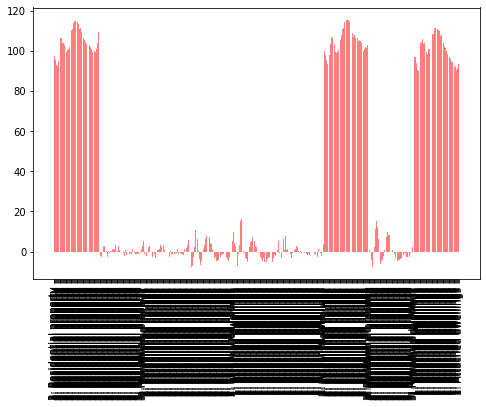

In [24]:
plt.figure(figsize=(8,5))
plt.bar(x_axis, Perth_housedata["Observation Value"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations,  Perth_housedata["Property Type"], rotation="vertical")

In [18]:
Perth_Residential_property.count()

DATAFLOW               159
Unit of Measurement    159
Property Type          159
Region                 159
Frequency              159
Time Period            159
Observation Value      159
dtype: int64

In [19]:
Measurment_by_Index_numbers = Perth_housedata.loc[Perth_housedata["Unit of Measurement"] == "1: Index Numbers"]
Measurment_by_Index_numbers

,DATAFLOW,Unit of Measurement,Property Type,Region,Frequency,Time Period,Observation Value
212,ABS:RPPI(1.0.0),1: Index Numbers,3: Residential property,Greater Perth,Q: Quarterly,2008-Q1,99.5
213,ABS:RPPI(1.0.0),1: Index Numbers,3: Residential property,Greater Perth,Q: Quarterly,2008-Q2,97.6
214,ABS:RPPI(1.0.0),1: Index Numbers,3: Residential property,Greater Perth,Q: Quarterly,2008-Q3,95.3
215,ABS:RPPI(1.0.0),1: Index Numbers,3: Residential property,Greater Perth,Q: Quarterly,2008-Q4,92.9
216,ABS:RPPI(1.0.0),1: Index Numbers,3: Residential property,Greater Perth,Q: Quarterly,2009-Q1,92.5
...,...,...,...,...,...,...,...
2486,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,Greater Perth,Q: Quarterly,2020-Q1,92.2
2487,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,Greater Perth,Q: Quarterly,2020-Q2,90.3
2488,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,Greater Perth,Q: Quarterly,2020-Q3,91.5
2489,ABS:RPPI(1.0.0),1: Index Numbers,1: Attached dwellings,Greater Perth,Q: Quarterly,2020-Q4,93.5


In [20]:
Measurment_by_Index_numbers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 212 to 2490
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATAFLOW             159 non-null    object 
 1   Unit of Measurement  159 non-null    object 
 2   Property Type        159 non-null    object 
 3   Region               159 non-null    object 
 4   Frequency            159 non-null    object 
 5   Time Period          159 non-null    object 
 6   Observation Value    159 non-null    float64
dtypes: float64(1), object(6)
memory usage: 9.9+ KB


In [21]:
#  # Combine the data into a single dataset.  
# data_complete = pd.merge(reduced_columns_df, commodities_data, on="Date", how="outer")
# data_complete